# The best place to live as a computer science graduate

In [23]:
import pandas as pd
import geopandas

cityMap = geopandas.read_file("Neighborhoods_.shp")

## Smart Trash Containers

I chose the dataset of smart trash containres locations. Newly computer science graudates are always trying to use new tech, and why not smart trash containers?

In [24]:
trashContainerCSV = pd.read_csv("smart-trash-containers.csv")
trashContainerDF = pd.DataFrame(trashContainerCSV)

trashContainerDF.head()

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,1,74,2017-09-14T13:24:40,2021-11-30T02:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,3,74,2017-09-14T13:24:40,2021-11-25T13:29:21,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
2,4,74,2017-09-14T13:24:40,2021-11-30T02:19:36,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
3,5,74,2017-09-19T12:22:45,2021-11-30T07:05:17,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
4,6,74,2017-09-19T12:22:46,2021-11-30T11:05:21,1st Division,1501 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,1-21,-80.015758,40.457025


### Manipulating the data frame

The dataset contains all the smart trash containers and tells us which neighborhood they are in. This is great! Although, we need to know the amount of smart trash containers in each neighborhood to accurately pick the best neighborhood for computer science graduates.

Here, I am looping through all the neighborhoods and keeping track of how many times each neighborhood shows up.

In [25]:
neighborhoodSTCCount = {}

for n in trashContainerDF.neighborhood:
    # For some reason one of the blank neighborhoods were of type float
    if isinstance(n, float): continue
    
    if not n in neighborhoodSTCCount:
        neighborhoodSTCCount[n] = 1
        continue
    neighborhoodSTCCount[n] += 1

STCDataFrame = pd.DataFrame({ "neighborhoods": neighborhoodSTCCount.keys(), "count": neighborhoodSTCCount.values() })
print(STCDataFrame)

               neighborhoods  count
0          Central Northside      9
1           Allegheny Center      7
2       California-Kirkbride      4
3         Marshall-Shadeland     15
4                 Manchester      6
..                       ...    ...
74  Lincoln-Lemington-Belmar      6
75             Homewood West      4
76       Upper Lawrenceville     16
77           Stanton Heights      2
78            Swisshelm Park      1

[79 rows x 2 columns]


### Merging the data to make it pretty

Now that we have the amount of smart trash containers in each neighborhood, we can now map all that data to the map of Pittsburgh. Doing this will easily produce a bunch of polygons that correspond to the neighborhoods.

In [26]:
STCMerge = cityMap.merge(STCDataFrame, how="left", left_on="hood", right_on="neighborhoods")
STCMerge.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,neighborhoods,count
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",Central Oakland,39.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",North Oakland,15.0
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",West Oakland,9.0
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",Crawford-Roberts,22.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",Strip District,41.0


### Visualizing our data

Now that we have merged our data, we can now see each neighborhood in Pittsburgh.

<AxesSubplot:>

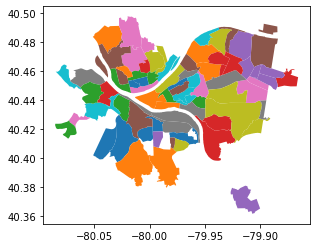

In [27]:
STCMerge.plot(column="neighborhoods")

### Mapping our count to the map

Looking at all the neighborhoods is cool, but now we want to create a heat map to make it easy for people to see roughly the amount of smart trash containers in each neighborhood.


<AxesSubplot:>

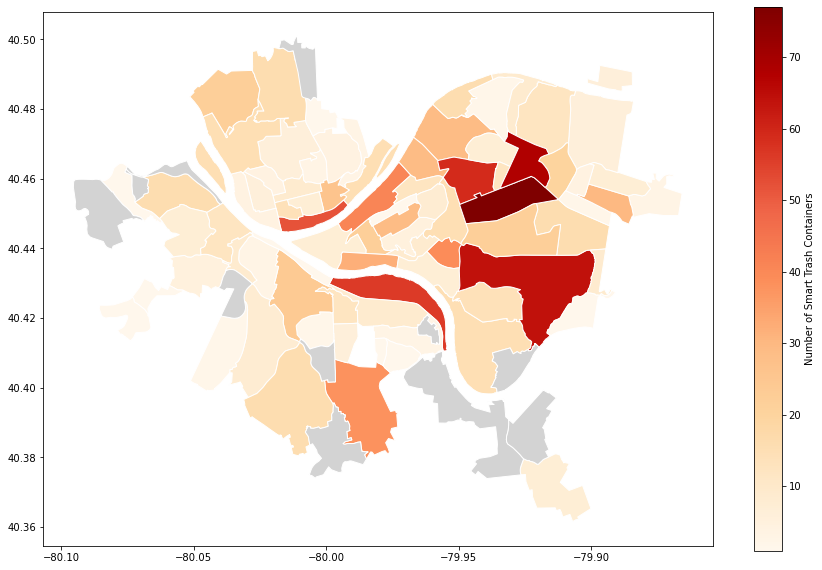

In [28]:
STCMerge.plot(column='count', 
       cmap='OrRd', 
       edgecolor="white", 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Smart Trash Containers"})

### Leaderboard

Now that we plotted our heat map, we want to pinpoint the top neighborhoods. To do this, we need to sort all of the neighborhoods is descending order.


In [31]:
sortedNeighborhoods = sorted(neighborhoodSTCCount.items(), key=lambda x: x[1], reverse=True)

for i in range(5):
    print(f"{i+1}) {sortedNeighborhoods[i][0]}: {sortedNeighborhoods[i][1]}")

maxAmt = sortedNeighborhoods[0]
minAmt = sortedNeighborhoods[len(sortedNeighborhoods)-1]
print(f'Neighborhood with the most amount of smart trash containers is {maxAmt[0]} with {maxAmt[1]}')
print(f'Neighborhood with the least amount of smart trash containers is {minAmt[0]} with {minAmt[1]}')

1) Shadyside: 77
2) East Liberty: 68
3) Squirrel Hill South: 64
4) Bloomfield: 59
5) South Side Flats: 56
Neighborhood with the most amount of smart trash containers is Shadyside with 77
Neighborhood with the least amount of smart trash containers is Swisshelm Park with 1
